In [1]:
import sys
import os
import talib 

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))




In [2]:
from src.data_loader import load_stock_data
filepath = r'C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\yfinance_data\MSFT_historical_data.csv'
df_msft = load_stock_data(filepath)
print(df_msft.head())

✅ Pandas valid dates: 9672 / 9672
✅ Total valid after dateutil: 9672 / 9672
                  Date      Open      High       Low     Close  Adj Close  \
0  1986-03-13 00:00:00  0.088542  0.101563  0.088542  0.097222   0.059946   
1  1986-03-14 00:00:00  0.097222  0.102431  0.097222  0.100694   0.062087   
2  1986-03-17 00:00:00  0.100694  0.103299  0.100694  0.102431   0.063158   
3  1986-03-18 00:00:00  0.102431  0.103299  0.098958  0.099826   0.061552   
4  1986-03-19 00:00:00  0.099826  0.100694  0.097222  0.098090   0.060482   

       Volume  Dividends  Stock Splits  
0  1031788800        0.0           0.0  
1   308160000        0.0           0.0  
2   133171200        0.0           0.0  
3    67766400        0.0           0.0  
4    47894400        0.0           0.0  


In [3]:
from src.date_range import print_all_date_ranges
stock_dfs = {
    'MSFT': df_msft
}

print_all_date_ranges(stock_dfs)

MSFT: 1986-03-13 to 2024-07-30


In [4]:
# Assume your DataFrame is called df_news
# AAPL headline date range: 2020-03-09 to 2020-06-10

df_msft_news = df_msft[
    (df_msft['Date'] >= '2020-03-09') &
    (df_msft['Date'] <= '2020-06-10')
]


In [5]:
from src.date_range import print_all_date_ranges
stock_dfs = {
    'AAPL': df_msft_news
}

print_all_date_ranges(stock_dfs)

AAPL: 2020-03-09 to 2020-06-10


In [6]:
print("Null values count per column:")
print(df_msft.isnull().sum())


Null values count per column:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


no valuse is null. ready to go!

In [7]:
df_msft_news.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,66,66.000000,66.000000,66.000000,66.000000,66.000000,6.600000e+01,66.000000,66.0
mean,2020-04-23 20:43:38.181818112,169.543788,172.799394,166.784092,169.930303,163.418732,4.892933e+07,0.007727,0.0
min,2020-03-09 00:00:00,137.009995,140.570007,132.520004,135.419998,130.141006,2.082690e+07,0.000000,0.0
25%,2020-03-31 06:00:00,155.607506,160.707504,151.409996,157.990005,151.831211,3.319870e+07,0.000000,0.0
50%,2020-04-23 12:00:00,174.395004,177.089996,172.389999,174.560005,167.755280,4.201785e+07,0.000000,0.0
75%,2020-05-17 06:00:00,182.702496,184.527504,181.432507,182.897499,176.149197,6.156922e+07,0.000000,0.0
max,2020-06-10 00:00:00,191.130005,198.520004,191.009995,196.839996,189.693588,9.322640e+07,0.510000,0.0
std,NaN,15.658479,14.090185,16.622953,15.817431,15.313334,1.955369e+07,0.062777,0.0


In [8]:
from src.missing_date import find_missing_dates
missing_dates = find_missing_dates(
    df_msft_news,
    date_col='Date',
    start_date='2020-03-09',
    end_date='2020-06-10',
    freq='D'
)

print("Missing dates:")
print(missing_dates)
print(f"Total missing: {len(missing_dates)}")

Missing dates:
DatetimeIndex(['2020-03-14', '2020-03-15', '2020-03-21', '2020-03-22',
               '2020-03-28', '2020-03-29', '2020-04-04', '2020-04-05',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-18',
               '2020-04-19', '2020-04-25', '2020-04-26', '2020-05-02',
               '2020-05-03', '2020-05-09', '2020-05-10', '2020-05-16',
               '2020-05-17', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-30', '2020-05-31', '2020-06-06', '2020-06-07'],
              dtype='datetime64[ns]', freq=None)
Total missing: 28


In [9]:
from src.missing_date import download_missing_yfinance_data
missing_dates =['2020-03-14', '2020-03-15', '2020-03-21', '2020-03-22',
               '2020-03-28', '2020-03-29', '2020-04-04', '2020-04-05',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-18',
               '2020-04-19', '2020-04-25', '2020-04-26', '2020-05-02',
               '2020-05-03', '2020-05-09', '2020-05-10', '2020-05-16',
               '2020-05-17', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-30', '2020-05-31', '2020-06-06', '2020-06-07']
download_missing_yfinance_data(missing_dates, ticker_symbol='AAPL', show_empty=True)

$AAPL: possibly delisted; no price data found  (1d 2020-03-14 -> 2020-03-15 00:00:00)


No data for 2020-03-14


$AAPL: possibly delisted; no price data found  (1d 2020-03-15 -> 2020-03-16 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-03-21 -> 2020-03-22 00:00:00)


No data for 2020-03-15
No data for 2020-03-21


$AAPL: possibly delisted; no price data found  (1d 2020-03-22 -> 2020-03-23 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-03-28 -> 2020-03-29 00:00:00)


No data for 2020-03-22


$AAPL: possibly delisted; no price data found  (1d 2020-03-29 -> 2020-03-30 00:00:00)


No data for 2020-03-28


$AAPL: possibly delisted; no price data found  (1d 2020-04-04 -> 2020-04-05 00:00:00)


No data for 2020-03-29
No data for 2020-04-04


$AAPL: possibly delisted; no price data found  (1d 2020-04-05 -> 2020-04-06 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-04-10 -> 2020-04-11 00:00:00)


No data for 2020-04-05
No data for 2020-04-10


$AAPL: possibly delisted; no price data found  (1d 2020-04-11 -> 2020-04-12 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-04-12 -> 2020-04-13 00:00:00)


No data for 2020-04-11
No data for 2020-04-12


$AAPL: possibly delisted; no price data found  (1d 2020-04-18 -> 2020-04-19 00:00:00)


No data for 2020-04-18


$AAPL: possibly delisted; no price data found  (1d 2020-04-19 -> 2020-04-20 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-04-25 -> 2020-04-26 00:00:00)


No data for 2020-04-19
No data for 2020-04-25


$AAPL: possibly delisted; no price data found  (1d 2020-04-26 -> 2020-04-27 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-05-02 -> 2020-05-03 00:00:00)


No data for 2020-04-26
No data for 2020-05-02


$AAPL: possibly delisted; no price data found  (1d 2020-05-03 -> 2020-05-04 00:00:00)


No data for 2020-05-03


$AAPL: possibly delisted; no price data found  (1d 2020-05-09 -> 2020-05-10 00:00:00)


No data for 2020-05-09


$AAPL: possibly delisted; no price data found  (1d 2020-05-10 -> 2020-05-11 00:00:00)


No data for 2020-05-10


$AAPL: possibly delisted; no price data found  (1d 2020-05-16 -> 2020-05-17 00:00:00)


No data for 2020-05-16


$AAPL: possibly delisted; no price data found  (1d 2020-05-17 -> 2020-05-18 00:00:00)


No data for 2020-05-17


$AAPL: possibly delisted; no price data found  (1d 2020-05-23 -> 2020-05-24 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-05-24 -> 2020-05-25 00:00:00)


No data for 2020-05-23
No data for 2020-05-24


$AAPL: possibly delisted; no price data found  (1d 2020-05-25 -> 2020-05-26 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-05-30 -> 2020-05-31 00:00:00)


No data for 2020-05-25


$AAPL: possibly delisted; no price data found  (1d 2020-05-31 -> 2020-06-01 00:00:00)


No data for 2020-05-30
No data for 2020-05-31


$AAPL: possibly delisted; no price data found  (1d 2020-06-06 -> 2020-06-07 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-06-07 -> 2020-06-08 00:00:00)


No data for 2020-06-06
No data for 2020-06-07


{}

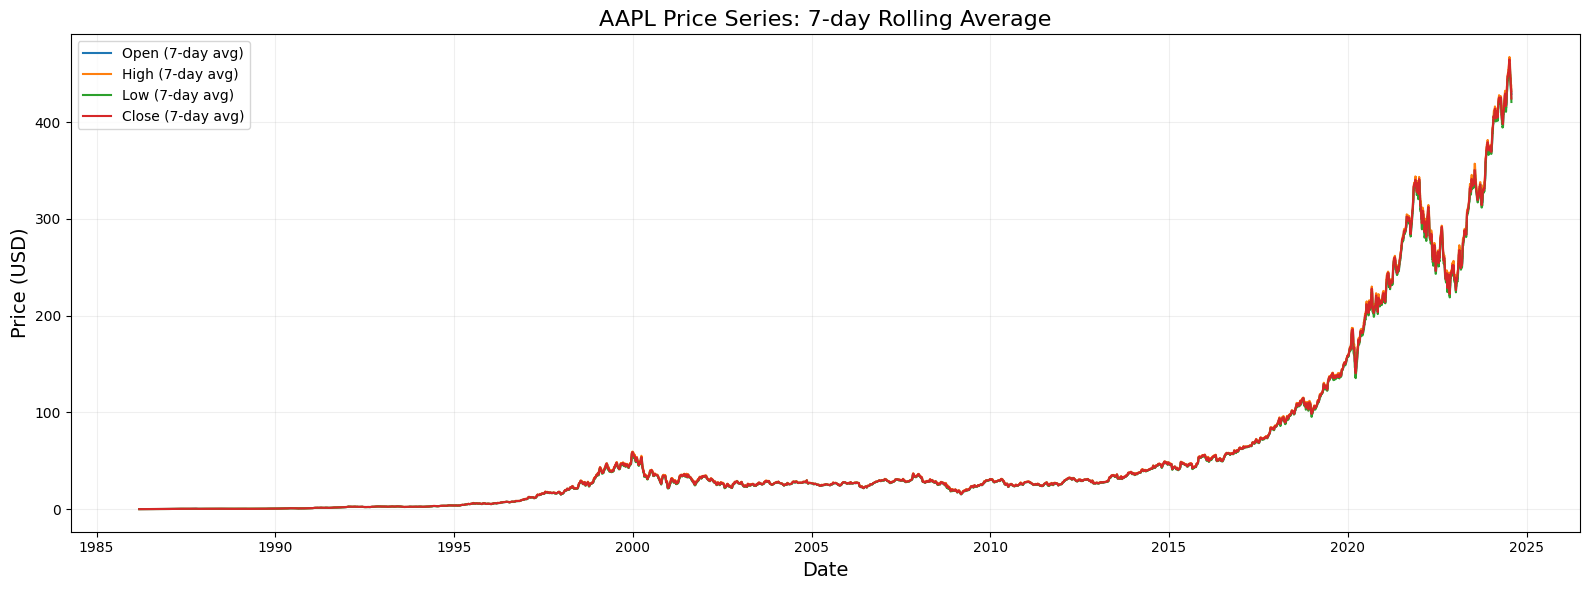

In [10]:
import matplotlib.pyplot as plt
from src.visualization import get_rolling_series

plt.figure(figsize=(16, 6))

for col in ['Open', 'High', 'Low', 'Close']:
    rolling_series = get_rolling_series(df_msft, value_col=col, window=7)
    plt.plot(
        rolling_series.index, 
        rolling_series.values, 
        label=f"{col.title()} (7-day avg)"
    )

plt.title("AAPL Price Series: 7-day Rolling Average", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_ma.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'SMA_{sma_period}'] = talib.SMA(df[price_col], timeperiod=sma_period)
c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_ma.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'EMA_{ema_period}'] = talib.EMA(df[price_col], timeperiod=ema_period)


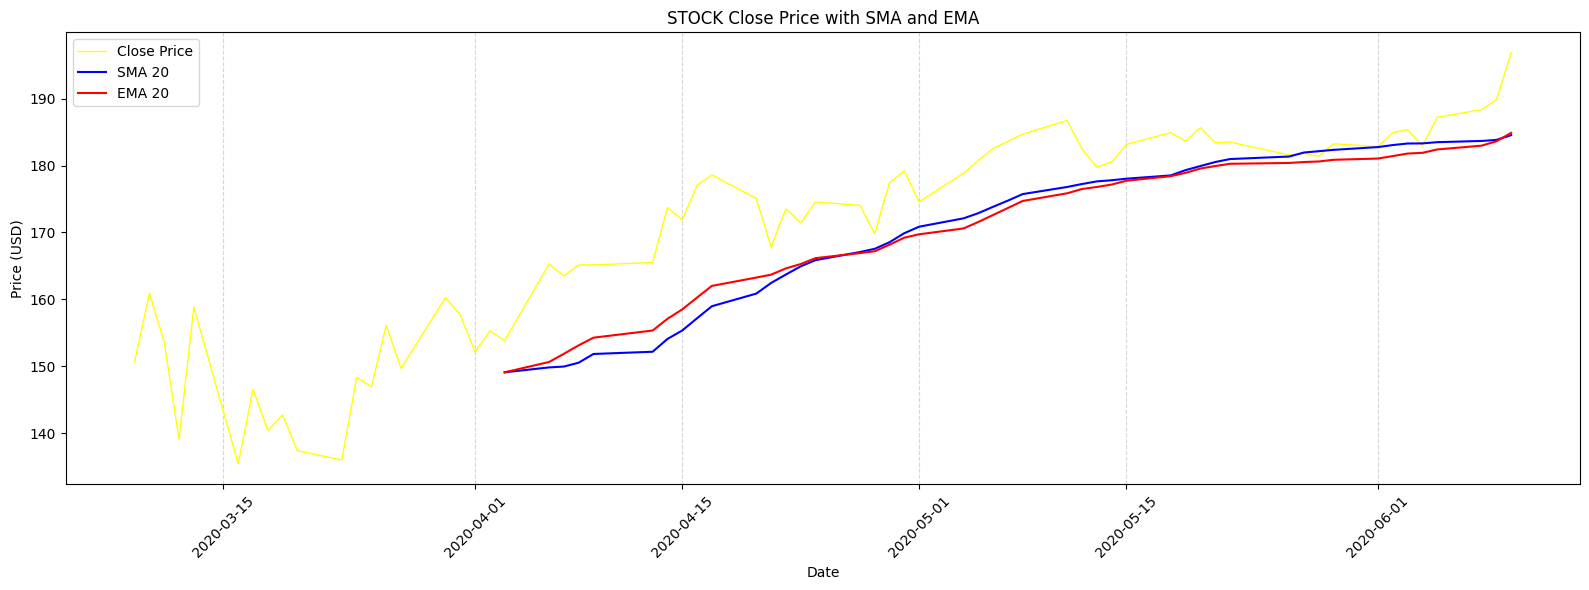

In [11]:
from src.plot_ma import plot_ma
plot_ma(df_msft_news, 'Close')

## Interpreting Technical Indicators with TA-Lib: SMA, EMA, and Price Trend

The graph above overlays three key lines for AAPL stock:
- **Close Price** (black): The actual market closing price of AAPL for each trading day.
- **SMA 20** (blue): The 20-day Simple Moving Average, which calculates the unweighted average of the previous 20 closing prices for each point in time.
- **EMA 20** (red): The 20-day Exponential Moving Average, which is similar to the SMA but gives more weight to recent prices, making it more responsive to new market information.

**TA-Lib** is a widely-used library for financial technical analysis. It computes indicators like SMA and EMA, which traders and analysts use to understand price trends, identify potential buy or sell signals, and smooth out short-term volatility in market data.

##### Both the SMA and EMA are trending up, confirming a bullish trend.

The lines stay in order: yellow (price) > red (EMA) > blue (SMA), a classic sign of a strong and established uptrend.

**Signals:**
When the price crosses above the moving averages, it’s often seen as a “buy” signal.
When it’s below, it’s a “sell” signal.

**Momentum:**
The bigger the gap between the yellow line and the moving averages, the stronger the trend (but sometimes this can mean the stock is “overbought” and may pull back soon).


### Key Insights from the Plot:
1. Early Period (March)
The stock price (yellow) is falling and bouncing up and down—the market is shaky or uncertain.

Both moving averages (blue and red) are lower and flat at first, then start rising as the price finds a bottom and begins to recover.

The SMA (blue) is smoother and slower to react, while the EMA (red) turns upward a bit earlier.

2. Middle Period (April–May)
Clear Uptrend: The stock price starts rising steadily.

Price (yellow) stays above both the SMA and EMA, which is a strong bullish (upward) sign.

EMA (red) tracks closer to the price, adjusting more quickly to each new high.

SMA (blue) is a bit below the price and the EMA, showing the “slow and steady” trend.

3. Late Period (June)
The uptrend continues; the price moves even higher, and both moving averages follow, confirming strong momentum.

The gap between the price and the moving averages grows—momentum is strong but might be getting a little “extended” (sometimes a sign to be watchful for a cool-down or small drop).

**Key Takeaways for My Project**
Trend Confirmation:
The SMA and EMA confirm the market direction. When both are moving up and the price is above them, the trend is solidly upward.

**Momentum Strength:**
The EMA turns up before the SMA and hugs the price more tightly. This is helpful for spotting early changes in momentum.

**In summary:** This visualization, powered by TA-Lib’s moving average calculations, allows us to detect overall trend direction, identify potential turning points, and gain a clearer view of price momentum for informed decision-making.


c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_rsi.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[rsi_col] = talib.RSI(df[price_col], timeperiod=rsi_period)


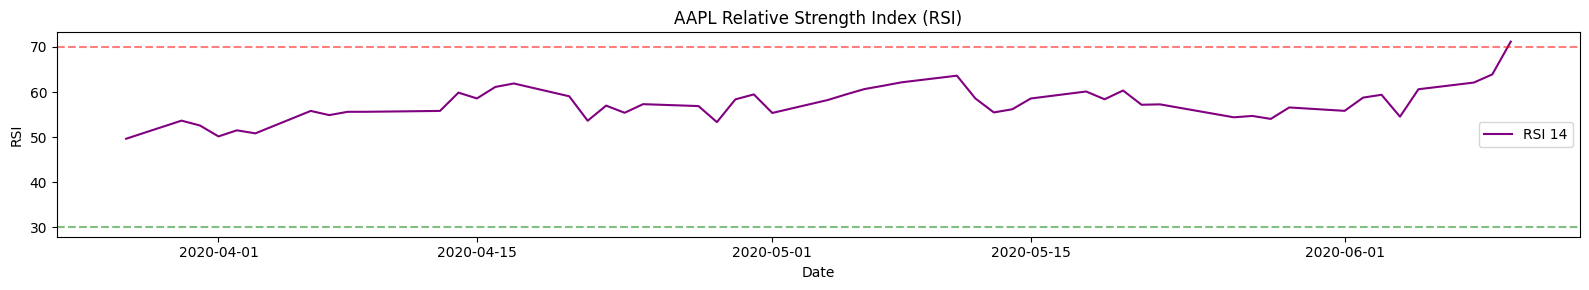

In [12]:
from src.plot_rsi import plot_rsi

# For Apple, using Close price:
plot_rsi(df_msft_news, price_col='Close', ticker_name='AAPL')




## Interpreting the Relative Strength Index (RSI) with TA-Lib

The graph above visualizes the **14-day Relative Strength Index (RSI)** for AAPL, a momentum oscillator computed by TA-Lib. RSI is a popular indicator used by traders to measure the speed and magnitude of recent price changes.

- **RSI 14 (purple line):** This shows the relative strength over a 14-day period, ranging from 0 to 100.
- **Overbought threshold (red dashed line at 70):** When the RSI is above 70, it signals that the stock may be overbought or overvalued, and a price correction or pullback could be imminent.
- **Oversold threshold (green dashed line at 30):** When the RSI is below 30, it suggests that the stock may be oversold or undervalued, indicating a possible rebound or buying opportunity.

### Key Insights from the RSI Plot:

**March to Early May:**

RSI moves between 50 and 60, sometimes above 60:

This means the stock is generally gaining strength but not “overbought.”

It’s in a healthy uptrend, but not at an extreme.

**Mid-May:**

RSI dips a bit, stays between 55 and 60:

Momentum cools off but does not go negative.

No sign of the stock being oversold.

**Late May to June:**

RSI climbs again, especially in early June.

Right at the end of the chart, RSI jumps above 70:

This is the first entry into the overbought zone.

The stock has gotten very strong, but it could be due for a pause or a drop soon.

What does this mean for your analysis?
**No oversold signals:**
The RSI never gets near 30—there’s no evidence of the stock being “too cheap” or in a crash.

**Uptrend with growing strength:**
Most of the time, RSI is above 50, showing steady upward price movement.

**Watch for reversals after overbought:**
When RSI breaks above 70, many traders take it as a sign the stock might be “overbought.” Sometimes price can stall, pause, or even pull back after this.

c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_macd.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[macd_col] = macd
c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_macd.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[signal_col] = signal
c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_macd.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

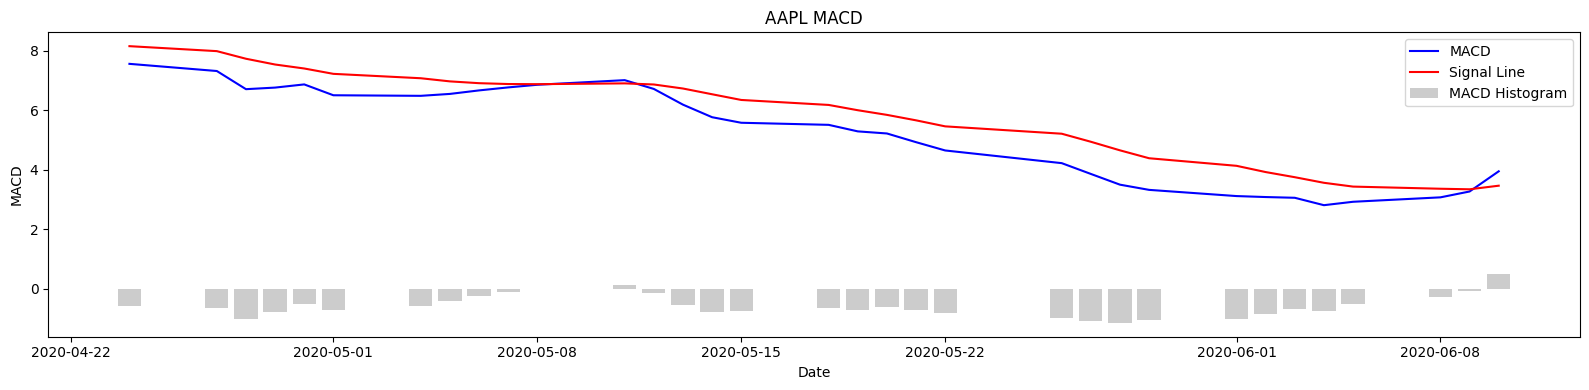

In [13]:
from src.plot_macd import plot_macd

# For Apple with Close price
plot_macd(df_msft_news, price_col='Close', ticker_name='AAPL')

## Interpreting the MACD Indicator with TA-Lib
What is MACD?
MACD (Moving Average Convergence Divergence) is a technical indicator used to spot trends and momentum in a stock’s price.

The chart has:

Blue line: The MACD value itself (difference between two moving averages of price)

Red line: The Signal Line (a moving average of the MACD)

Gray bars: The MACD Histogram (shows the difference between MACD and Signal Line; bigger bars = bigger momentum)

What Does Your Chart Show?
1. April–Early May
MACD and Signal Line both start high but begin to drop.

MACD (blue) is below the Signal Line (red) most of the time—bearish signal (price momentum is downward).

The MACD Histogram bars are mostly below zero (gray bars under the middle line), which confirms the weak/downward trend.

2. Mid–Late May
Both lines keep dropping, showing the stock is still losing momentum.

When the MACD gets closer to the Signal Line (the lines almost touch), the histogram bars get closer to zero—trend is slowing, possibly about to change.

3. Early June
MACD (blue) line starts to turn up just a bit, nearing the Signal Line.

Histogram bars flip from negative toward zero and even go slightly positive at the end, hinting momentum might be shifting upward.